### Problem 1: The K Means Clustering Method
(a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from collections import Counter


# Load the IRIS dataset
iris = load_iris()
X = iris.data  # Features
y_true = iris.target  # True class labels
feature_names = iris.feature_names
target_names = iris.target_names


# Define distance functions
def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b), axis=1)

def chebyshev_distance(a, b):
    return np.max(np.abs(a - b), axis=1)


# Implement K-means clustering
def k_means(X, K, distance_metric='euclidean', max_iters=100):
    # Initialize centroids randomly from the dataset
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), K, replace=False)]
    
    for _ in range(max_iters):
        # Compute distances and assign clusters
        if distance_metric == 'euclidean':
            distances = np.array([euclidean_distance(X, centroid) for centroid in centroids])
        elif distance_metric == 'manhattan':
            distances = np.array([manhattan_distance(X, centroid) for centroid in centroids])
        elif distance_metric == 'chebyshev':
            distances = np.array([chebyshev_distance(X, centroid) for centroid in centroids])
        else:
            raise ValueError("Unsupported distance metric.")
        
        cluster_labels = np.argmin(distances, axis=0)
        
        # Update centroids
        new_centroids = np.array([X[cluster_labels == k].mean(axis=0) for k in range(K)])
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        
    return cluster_labels, centroids

<div style="page-break-after: always;"></div>
(b) & (c) combined

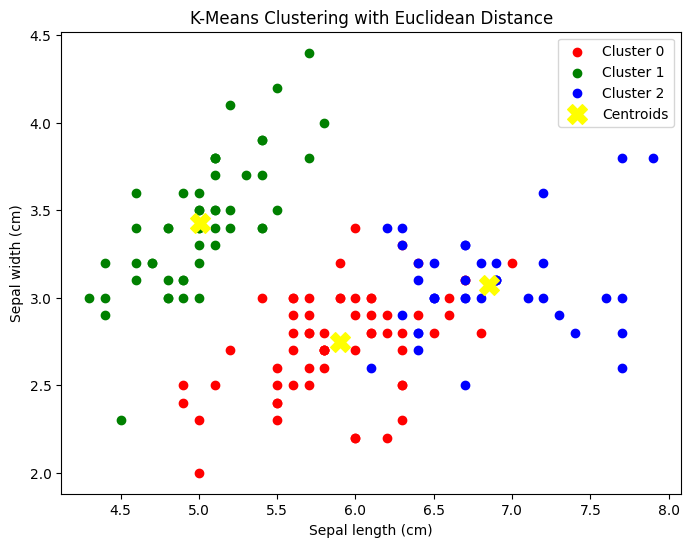

Accuracy with Euclidean distance: 0.8933


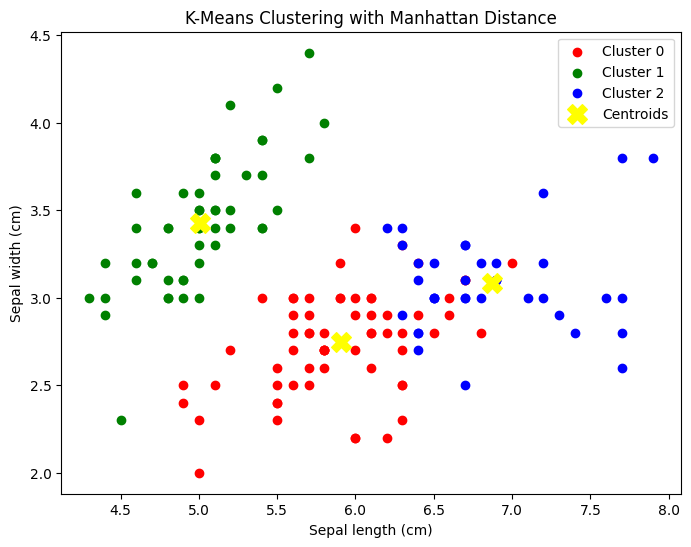

Accuracy with Manhattan distance: 0.8867


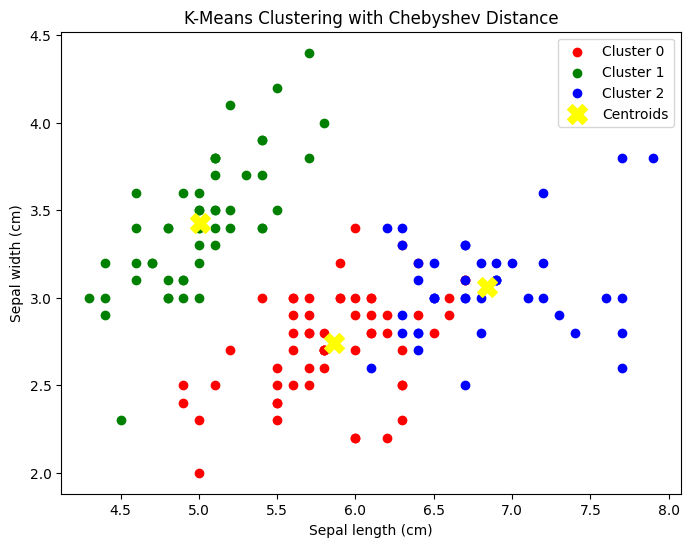

Accuracy with Chebyshev distance: 0.8867


In [2]:
# Run K-means with different distance metrics
K = 3
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

for metric in distance_metrics:
    cluster_labels, centroids = k_means(X, K, distance_metric=metric)
    
    # Visualization on the first two features
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    for k in range(K):
        cluster = X[cluster_labels == k]
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[k], label=f'Cluster {k}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='X', label='Centroids')
    plt.title(f'K-Means Clustering with {metric.capitalize()} Distance')
    plt.xlabel(feature_names[0].capitalize())
    plt.ylabel(feature_names[1].capitalize())
    plt.legend()
    plt.show()
    
    # Evaluate accuracy
    # Map cluster labels to true labels
    label_mapping = {}
    for k in range(K):
        true_labels = y_true[cluster_labels == k]
        if len(true_labels) == 0:
            continue
        most_common = Counter(true_labels).most_common(1)[0][0]
        label_mapping[k] = most_common
    predicted_labels = np.array([label_mapping[label] for label in cluster_labels])
    accuracy = np.mean(predicted_labels == y_true)
    print(f'Accuracy with {metric.capitalize()} distance: {accuracy:.4f}')

<div style="page-break-after: always;"></div>

### Problem 2: The PCA Method